In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('../Data_target/counts_locus.xlsx')

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your data
df = pd.read_excel('../Data_target/counts_locus.xlsx')

# Assuming 'People' is your feature and 'Count' is your target
X = df[['People']]  # Features
y = df['Count']     # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example prediction for a specific number of people
num_people = 2
predicted_count = model.predict([[num_people]])
print(f"Predicted count for {num_people} people: {predicted_count[0]}")


Mean Squared Error: 126.26170288012791
Predicted count for 2 people: 10.526536846124474


C:\Huiswerk.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


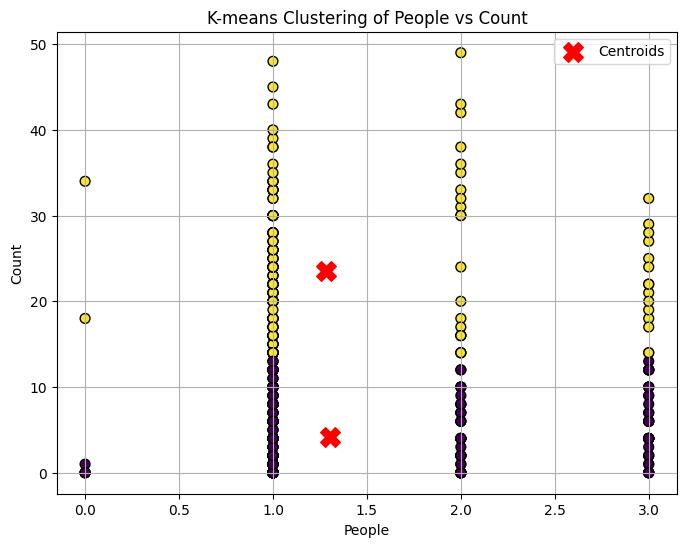

Predicted cluster for 50 people: [0]


C:\Huiswerk.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel('../Data_target/counts_locus.xlsx')

# Assuming 'People' and 'Count' are your features
X = df[['People', 'Count']]

# Initialize and fit K-means model
kmeans = KMeans(n_clusters=2)  # You may choose appropriate number of clusters based on your data
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting clusters (if 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(X['People'], X['Count'], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, label='Centroids')
plt.xlabel('People')
plt.ylabel('Count')
plt.title('K-means Clustering of People vs Count')
plt.legend()
plt.grid(True)
plt.show()

# Example prediction for a specific number of people
num_people = 50
predicted_cluster = kmeans.predict([[num_people, 0]])  # Assuming Count is not known for prediction
print(f"Predicted cluster for {num_people} people: {predicted_cluster}")